#### Goals

Run and analyze their loyalty program; Describe data with pivot table.

**Table 1: Sales**  
- Breakdown of the count of each item sold per month /
- Breakdown of the total sale value per item per month /

<em>Each line item should be its own row. They should not be bundled into one row</em>


**Table 2: Loyalty Tracker**  
- Columns are each month covered by the transactional data  
- Rows are the following metrics: Repeaters, Inactive, Engaged   

In [1]:
# import data ecosystems

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load json file to dataframe

filename = "transaction-data-adhoc-analysis.json"
df = pd.read_json(filename)
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


## Table 1: Sales

### <em>Objective 1 - Breakdown of the count of each item sold per month /</em>

In [3]:
# separate transaction items into individual columns and rows to avoid bundling of data

# https://thewebdev.info/2022/03/26/how-to-split-text-in-a-column-into-multiple-rows-with-python-pandas/
split_1 = df[['transaction_items', 'transaction_date']]
split_1 = df['transaction_items'].str.split(';')

split_2 = split_1.explode('transaction_items').reset_index(drop=True)
split_3 = split_2.str.split(',', expand=True)

# https://www.statology.org/pandas-rename-columns/
new_columns = ['Brand Name', 'Product Name', 'Quantity']
split_3.rename(columns={0:'Brand', 1:'Product', 2:'Quantity'}, inplace = True)
pd.DataFrame(split_3)

,Brand,Product,Quantity
0,Exotic Extras,Beef Chicharon,(x4)
1,Exotic Extras,Beef Chicharon,(x3)
2,HealthyKid 3+,Nutrional Milk,(x4)
3,Candy City,Orange Beans,(x1)
4,HealthyKid 3+,Gummy Vitamins,(x3)
...,...,...,...
166114,HealthyKid 3+,Nutrional Milk,(x2)
166115,Candy City,Gummy Worms,(x2)
166116,HealthyKid 3+,Nutrional Milk,(x1)
166117,Candy City,Gummy Worms,(x3)


In [4]:
# get all months accross the transaction period
split_date = df['transaction_date'].str.split('/', n=3, expand=True)
split_date.rename(columns={0:'Year',1:'Month',2:'Day'}, inplace = True)
split_date

,Year,Month,Day
0,2022,01,12
1,2022,01,12
2,2022,01,08
3,2022,01,10
4,2022,01,24
...,...,...,...
83031,2022,06,05
83032,2022,06,12
83033,2022,06,15
83034,2022,06,09


In [5]:
month = split_date.drop(['Year', 'Day'], axis=1)
month

,Month
0,01
1,01
2,01
3,01
4,01
...,...
83031,06
83032,06
83033,06
83034,06


In [6]:
# combine month, brand, product, and quantity in 1 dataframe
table_1A = pd.concat([month, split_3.rename(columns={0:'Brand',1:'Product',2:'Quantity'})], axis =1)
table_1A.head()

,Month,Brand,Product,Quantity
0,01,Exotic Extras,Beef Chicharon,(x4)
1,01,Exotic Extras,Beef Chicharon,(x3)
2,01,HealthyKid 3+,Nutrional Milk,(x4)
3,01,Candy City,Orange Beans,(x1)
4,01,HealthyKid 3+,Gummy Vitamins,(x3)


In [7]:
# clean values in the quantity column
table_1A['Quantity'].unique()

array(['(x4)', '(x3)', '(x1)', '(x2)'], dtype=object)

In [8]:
table_1A.loc[table_1A["Quantity"]=="(x4)",["Quantity"]]="4"
table_1A.loc[table_1A["Quantity"]=="(x3)",["Quantity"]]="3"
table_1A.loc[table_1A["Quantity"]=="(x2)",["Quantity"]]="2"
table_1A.loc[table_1A["Quantity"]=="(x1)",["Quantity"]]="1"

table_1A.head()

,Month,Brand,Product,Quantity
0,01,Exotic Extras,Beef Chicharon,4
1,01,Exotic Extras,Beef Chicharon,3
2,01,HealthyKid 3+,Nutrional Milk,4
3,01,Candy City,Orange Beans,1
4,01,HealthyKid 3+,Gummy Vitamins,3


In [9]:
# make quantity values integers

# https://datatofish.com/string-to-integer-dataframe/
table_1A["Quantity"] = table_1A["Quantity"].astype(int)
print(table_1A.dtypes)

Month       object
Brand       object
Product     object
Quantity     int32
dtype: object


In [10]:
# check updated table
table_1A.head()

,Month,Brand,Product,Quantity
0,01,Exotic Extras,Beef Chicharon,4
1,01,Exotic Extras,Beef Chicharon,3
2,01,HealthyKid 3+,Nutrional Milk,4
3,01,Candy City,Orange Beans,1
4,01,HealthyKid 3+,Gummy Vitamins,3


In [11]:
#### group data by product and month. get the summation of their quantities to get of the count of items sold per month.
table_1A.groupby(['Month', 'Product','Brand']).agg({"Quantity":np.sum})

# https://www.quora.com/How-do-I-merge-two-rows-into-one-row-by-an-index-using-pandas
# https://stackoverflow.com/questions/72049705/python-pandas-merge-rows-into-one-row-and-decide-what-operation-to-do-in-each-co

Quantity
Month Product            Brand                  
01    Beef Chicharon     Exotic Extras      4856
      Gummy Vitamins     HealthyKid 3+      4907
      Gummy Worms        Candy City         4801
      Kimchi and Seaweed Exotic Extras      4923
      Nutrional Milk     HealthyKid 3+      4854
      Orange Beans       Candy City         5059
      Yummy Vegetables   HealthyKid 3+      4978
02    Beef Chicharon     Exotic Extras      4979
      Gummy Vitamins     HealthyKid 3+      4959
      Gummy Worms        Candy City         4956
      Kimchi and Seaweed Exotic Extras      4937
      Nutrional Milk     HealthyKid 3+      5037
      Orange Beans       Candy City         4885
      Yummy Vegetables   HealthyKid 3+      5175
03    Beef Chicharon     Exotic Extras      5150
      Gummy Vitamins     HealthyKid 3+      5083
      Gummy Worms        Candy City         4950
      Kimchi and Seaweed Exotic Extras      4972
      Nutrional Milk     HealthyKid 3+      4746
      Orange Beans       Candy City         4836
      Yummy Vegetables   HealthyKid 3+      5086
04    Beef Chicharon     Exotic Extras      4745
      Gummy Vitamins     HealthyKid 3+      4806
      Gummy Worms        Candy City         4912
      Kimchi and Seaweed Exotic Extras      4907
      Nutrional Milk     HealthyKid 3+      4859
      Orange Beans       Candy City         5140
      Yummy Vegetables   HealthyKid 3+      5054
05    Beef Chicharon     Exotic Extras      4926
      Gummy Vitamins     HealthyKid 3+      5030
      Gummy Worms        Candy City         5051
      Kimchi and Seaweed Exotic Extras      4873
      Nutrional Milk     HealthyKid 3+      4974
      Orange Beans       Candy City         4744
      Yummy Vegetables   HealthyKid 3+      4961
06    Beef Chicharon     Exotic Extras      4849
      Gummy Vitamins     HealthyKid 3+      5050
      Gummy Worms        Candy City         4908
      Kimchi and Seaweed Exotic Extras      5010
      Nutrional Milk     HealthyKid 3+      4859
      Orange Beans       Candy City         4779
      Yummy Vegetables   HealthyKid 3+      4891

In [12]:
# List values

quantity = table_1A["Quantity"]
month = table_1A["Month"]

In [13]:
# table_1A.groupby(['Month', 'Product','Brand']).agg({"Quantity":np.sum}).first()

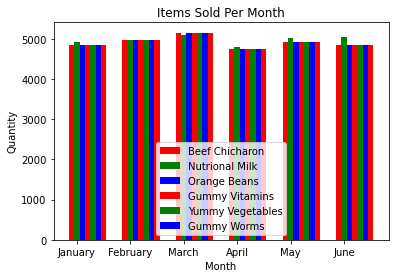

In [28]:
# show a visualization of the summarized data

# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

N = 6
ind = np.arange(N) 
width = 0.10
  
beef_c = [4856, 4979, 5150, 4745, 4926, 4849]
bar1 = plt.bar(ind, beef_c, width, color = 'r')

gummy_v = [4907, 4959, 5083, 4806, 5030, 5050]
bar2 = plt.bar(ind+width, gummy_v, width, color = 'g')

gummy_w = [4856, 4979, 5150, 4745, 4926, 4849]
bar3 = plt.bar(ind+width*2, gummy_w, width, color = 'b')

kimchi_s = [4856, 4979, 5150, 4745, 4926, 4849]
bar4 = plt.bar(ind+width*3, kimchi_s, width, color = 'r')

nut_m = [4856, 4979, 5150, 4745, 4926, 4849]
bar5 = plt.bar(ind+width*4, nut_m, width, color = 'g')

orange_b = [4856, 4979, 5150, 4745, 4926, 4849]
bar6 = plt.bar(ind+width*5, orange_b, width, color = 'b')

yummy_v = [4856, 4979, 5150, 4745, 4926, 4849]
bar7 = plt.bar(ind+width*6, yummy_v, width, color = 'r')
  
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Items Sold Per Month")
  
plt.xticks(ind+width,['January', 'February', 'March', 'April', 'May', 'June'])
plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6), ('Beef Chicharon', 'Nutrional Milk', 'Orange Beans', 'Gummy Vitamins', 'Yummy Vegetables', 'Gummy Worms', 'Kimchi and Seaweed') )
plt.show()

### <em>Objective 2 - Breakdown of the total sale value per item per month /</em>

In [32]:
# incorporate transaction value to dataframe
table_1B = pd.concat([table_1A, df["transaction_value"]], axis =1)
table_1B.head()

,Month,Brand,Product,Quantity,transaction_value
0,01,Exotic Extras,Beef Chicharon,4,5196.0
1,01,Exotic Extras,Beef Chicharon,3,12056.0
2,01,HealthyKid 3+,Nutrional Milk,4,5500.0
3,01,Candy City,Orange Beans,1,500.0
4,01,HealthyKid 3+,Gummy Vitamins,3,2697.0


In [33]:
print(table_1B.dtypes)

Month                 object
Brand                 object
Product               object
Quantity               int32
transaction_value    float64
dtype: object


In [34]:
# convert quantity and transaction values to integer values

# https://datatofish.com/string-to-integer-dataframe/
table_1B["Quantity"] = table_1B["Quantity"].astype(int)

#  https://sparkbyexamples.com/pandas/pandas-convert-float-to-integer-type#:~:text=To%20convert%20a%20column%20that,use%20astype()%20to%20convert.&text=Use%20.,values%20with%20integer%20value%20zero.
table_1B["transaction_value"] = table_1B["transaction_value"].fillna(0).astype(int)

print(table_1B.dtypes)

Month                object
Brand                object
Product              object
Quantity              int32
transaction_value     int32
dtype: object


In [35]:
# combine all needed columns in one dataframe
table_1B.groupby(['Month', 'Product','Brand']).agg({"Quantity":np.sum, "transaction_value":np.sum})

# https://www.quora.com/How-do-I-merge-two-rows-into-one-row-by-an-index-using-pandas
# https://stackoverflow.com/questions/72049705/python-pandas-merge-rows-into-one-row-and-decide-what-operation-to-do-in-each-co

Quantity  transaction_value
Month Product            Brand                                     
01    Beef Chicharon     Exotic Extras      4856            8995181
      Gummy Vitamins     HealthyKid 3+      4907            9055587
      Gummy Worms        Candy City         4801            8564797
      Kimchi and Seaweed Exotic Extras      4923            9159691
      Nutrional Milk     HealthyKid 3+      4854            8758669
      Orange Beans       Candy City         5059            8550704
      Yummy Vegetables   HealthyKid 3+      4978            9437936
02    Beef Chicharon     Exotic Extras      4979            8966888
      Gummy Vitamins     HealthyKid 3+      4959            8993410
      Gummy Worms        Candy City         4956            9040305
      Kimchi and Seaweed Exotic Extras      4937            8975510
      Nutrional Milk     HealthyKid 3+      5037            9246059
      Orange Beans       Candy City         4885            9038793
      Yummy Vegetables   HealthyKid 3+      5175            9559438
03    Beef Chicharon     Exotic Extras      5150            9269679
      Gummy Vitamins     HealthyKid 3+      5083            9254508
      Gummy Worms        Candy City         4950            8976293
      Kimchi and Seaweed Exotic Extras      4972            9167393
      Nutrional Milk     HealthyKid 3+      4746            8921327
      Orange Beans       Candy City         4836            9200190
      Yummy Vegetables   HealthyKid 3+      5086            9154456
04    Beef Chicharon     Exotic Extras      4745            8959610
      Gummy Vitamins     HealthyKid 3+      4806            8740608
      Gummy Worms        Candy City         4912            9306284
      Kimchi and Seaweed Exotic Extras      4907            8819170
      Nutrional Milk     HealthyKid 3+      4859            9156120
      Orange Beans       Candy City         5140            9119146
      Yummy Vegetables   HealthyKid 3+      5054            9320027
05    Beef Chicharon     Exotic Extras      4926            8981636
      Gummy Vitamins     HealthyKid 3+      5030            9387627
      Gummy Worms        Candy City         5051            9569930
      Kimchi and Seaweed Exotic Extras      4873            8893251
      Nutrional Milk     HealthyKid 3+      4974            9006873
      Orange Beans       Candy City         4744            8548527
      Yummy Vegetables   HealthyKid 3+      4961            9352831
06    Beef Chicharon     Exotic Extras      4849            8987634
      Gummy Vitamins     HealthyKid 3+      5050            9252118
      Gummy Worms        Candy City         4908            8763540
      Kimchi and Seaweed Exotic Extras      5010            9260005
      Nutrional Milk     HealthyKid 3+      4859            9239757
      Orange Beans       Candy City         4779            9014616
      Yummy Vegetables   HealthyKid 3+      4891            9186648

In [36]:
# find single-product transactions by excluding ";"

# https://www.skytowner.com/explore/getting_rows_where_values_do_not_contain_substring_in_pandas_dataframe
single_product = df[~df["transaction_items"].str.contains(";")]
single_product = single_product[["transaction_items","transaction_value"]]
single_product.head(20)

,transaction_items,transaction_value
0,"Exotic Extras,Beef Chicharon,(x4)",5196
3,"HealthyKid 3+,Yummy Vegetables,(x1)",500
6,"Exotic Extras,Kimchi and Seaweed,(x4)",3196
8,"Candy City,Gummy Worms,(x1)",150
11,"HealthyKid 3+,Gummy Vitamins,(x2)",3000
17,"HealthyKid 3+,Yummy Vegetables,(x3)",1500
18,"HealthyKid 3+,Nutrional Milk,(x3)",5970
19,"Candy City,Orange Beans,(x3)",597
26,"HealthyKid 3+,Yummy Vegetables,(x4)",2000
36,"HealthyKid 3+,Gummy Vitamins,(x4)",6000


In [37]:
table_1A["Product"].unique()

array(['Beef Chicharon', 'Nutrional Milk', 'Orange Beans',
       'Gummy Vitamins', 'Yummy Vegetables', 'Gummy Worms',
       'Kimchi and Seaweed'], dtype=object)

In [38]:
# assign prices to each product by dividing the transaction value with quantity of items purchased in single-product transactions

beef_chicharon = 1299
nutrional_milk = 1990
orange_beans = 199
gummy_vitamins = 1500
yummy_vegetables = 500
gummy_worms = 150
kimchi_and_seaweed = 799

In [39]:
# add price column to dataframe

# https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
def price (row):
    if row['Product'] == 'Beef Chicharon' :
      return 1299
    if row['Product'] == 'Nutrional Milk' :
      return 1990
    if row['Product'] == 'Orange Beans' :
      return 199
    if row['Product'] == 'Gummy Vitamins' :
      return 1500
    if row['Product'] == 'Yummy Vegetables' :
      return 500
    if row['Product'] == 'Gummy Worms' :
      return 150
    if row['Product'] == 'Kimchi and Seaweed' :
      return 799
    return 'Other'

table_1B.apply (lambda row: price(row), axis=1)

0         1299
1         1299
2         1990
3          199
4         1500
          ... 
166114    1990
166115     150
166116    1990
166117     150
166118     199
Length: 166119, dtype: int64

In [40]:
table_1B['Price'] = table_1B.apply (lambda row: price(row), axis=1)
table_1B

,Month,Brand,Product,Quantity,transaction_value,Price
0,01,Exotic Extras,Beef Chicharon,4,5196,1299
1,01,Exotic Extras,Beef Chicharon,3,12056,1299
2,01,HealthyKid 3+,Nutrional Milk,4,5500,1990
3,01,Candy City,Orange Beans,1,500,199
4,01,HealthyKid 3+,Gummy Vitamins,3,2697,1500
...,...,...,...,...,...,...
166114,NaN,HealthyKid 3+,Nutrional Milk,2,0,1990
166115,NaN,Candy City,Gummy Worms,2,0,150
166116,NaN,HealthyKid 3+,Nutrional Milk,1,0,1990
166117,NaN,Candy City,Gummy Worms,3,0,150


In [41]:
# determine sales value for each product transaction

table_1B['Sales'] = table_1B['Quantity'] * table_1B['Price']
table_1B

,Month,Brand,Product,Quantity,transaction_value,Price,Sales
0,01,Exotic Extras,Beef Chicharon,4,5196,1299,5196
1,01,Exotic Extras,Beef Chicharon,3,12056,1299,3897
2,01,HealthyKid 3+,Nutrional Milk,4,5500,1990,7960
3,01,Candy City,Orange Beans,1,500,199,199
4,01,HealthyKid 3+,Gummy Vitamins,3,2697,1500,4500
...,...,...,...,...,...,...,...
166114,NaN,HealthyKid 3+,Nutrional Milk,2,0,1990,3980
166115,NaN,Candy City,Gummy Worms,2,0,150,300
166116,NaN,HealthyKid 3+,Nutrional Milk,1,0,1990,1990
166117,NaN,Candy City,Gummy Worms,3,0,150,450


In [42]:
# group data by product and month to avoid duplicates
table_1B[["Month","Brand","Product","Quantity","Price","Sales"]]
table_1B.groupby(['Month', 'Product','Brand','Price']).agg({"Quantity":np.sum, "Sales":np.sum})

Quantity     Sales
Month Product            Brand         Price                    
01    Beef Chicharon     Exotic Extras 1299       4856   6307944
      Gummy Vitamins     HealthyKid 3+ 1500       4907   7360500
      Gummy Worms        Candy City    150        4801    720150
      Kimchi and Seaweed Exotic Extras 799        4923   3933477
      Nutrional Milk     HealthyKid 3+ 1990       4854   9659460
      Orange Beans       Candy City    199        5059   1006741
      Yummy Vegetables   HealthyKid 3+ 500        4978   2489000
02    Beef Chicharon     Exotic Extras 1299       4979   6467721
      Gummy Vitamins     HealthyKid 3+ 1500       4959   7438500
      Gummy Worms        Candy City    150        4956    743400
      Kimchi and Seaweed Exotic Extras 799        4937   3944663
      Nutrional Milk     HealthyKid 3+ 1990       5037  10023630
      Orange Beans       Candy City    199        4885    972115
      Yummy Vegetables   HealthyKid 3+ 500        5175   2587500
03    Beef Chicharon     Exotic Extras 1299       5150   6689850
      Gummy Vitamins     HealthyKid 3+ 1500       5083   7624500
      Gummy Worms        Candy City    150        4950    742500
      Kimchi and Seaweed Exotic Extras 799        4972   3972628
      Nutrional Milk     HealthyKid 3+ 1990       4746   9444540
      Orange Beans       Candy City    199        4836    962364
      Yummy Vegetables   HealthyKid 3+ 500        5086   2543000
04    Beef Chicharon     Exotic Extras 1299       4745   6163755
      Gummy Vitamins     HealthyKid 3+ 1500       4806   7209000
      Gummy Worms        Candy City    150        4912    736800
      Kimchi and Seaweed Exotic Extras 799        4907   3920693
      Nutrional Milk     HealthyKid 3+ 1990       4859   9669410
      Orange Beans       Candy City    199        5140   1022860
      Yummy Vegetables   HealthyKid 3+ 500        5054   2527000
05    Beef Chicharon     Exotic Extras 1299       4926   6398874
      Gummy Vitamins     HealthyKid 3+ 1500       5030   7545000
      Gummy Worms        Candy City    150        5051    757650
      Kimchi and Seaweed Exotic Extras 799        4873   3893527
      Nutrional Milk     HealthyKid 3+ 1990       4974   9898260
      Orange Beans       Candy City    199        4744    944056
      Yummy Vegetables   HealthyKid 3+ 500        4961   2480500
06    Beef Chicharon     Exotic Extras 1299       4849   6298851
      Gummy Vitamins     HealthyKid 3+ 1500       5050   7575000
      Gummy Worms        Candy City    150        4908    736200
      Kimchi and Seaweed Exotic Extras 799        5010   4002990
      Nutrional Milk     HealthyKid 3+ 1990       4859   9669410
      Orange Beans       Candy City    199        4779    951021
      Yummy Vegetables   HealthyKid 3+ 500        4891   2445500

In [ ]:
# show a visualization of the summarized data

## Table 2: Loyalty Tracker

In [43]:
# 1 Get table 1 and cummlative summation of items based on month and username
table_2 = pd.concat([month, df["name"]], axis =1)
table_2A = table_2
# table_2 = pd.concat([month, df.rename(columns={"name": "Name"})], axis =1)
table_2

,Month,name
0,01,Jennifer Campbell
1,01,Melissa Kim
2,01,Melissa Kim
3,01,Melissa Kim
4,01,Kristen Cooper
...,...,...
166114,NaN,NaN
166115,NaN,NaN
166116,NaN,NaN
166117,NaN,NaN


In [44]:
# table_2 = table_2.groupby(['Month']).agg({"Quantity":np.sum, "Sales":np.sum})

table_2 = table_2.groupby(['Month'])['name'].apply(', '.join).reset_index()
table_2

,Month,name
0,01,"Jennifer Campbell, Melissa Kim, Melissa Kim, M..."
1,02,"Jennifer Campbell, Jennifer Campbell, Melissa ..."
2,03,"Jennifer Campbell, Melissa Kim, Melissa Kim, K..."
3,04,"Melissa Kim, Kristen Cooper, Alexander Davis, ..."
4,05,"Melissa Kim, Melissa Kim, Melissa Kim, Kristen..."
5,06,"Jennifer Campbell, Jennifer Campbell, Alexande..."


In [46]:
table_2.dtypes

Month    object
name     object
dtype: object

In [ ]:
# categorize repeaters and count number of repeaters per month
def repeaters(table_2):
    month_r1 = 0
    month_r2 = 0
    month_r3 = 0
    month_r4 = 0
    month_r5 = 0
    month_r6 = 0
    
    for name in table_2.iloc[0,1]:
        if name in table_2.iloc[0,1]:
            month_r1 += 0
        else:
            month_r1 += 0
    for name in table_2.iloc[0,1]:
        if name in table_2.iloc[0,1] and name in table_2.iloc[1,1]:
            month_r2 += 1
        else:
            month_r2 += 0
    for name in table_2.iloc[1,1]:
        if name in table_2.iloc[1,1] and name in table_2.iloc[2,1]:
            month_r3 += 1
        else:
            month_r3 += 0
    for name in table_2.iloc[2,1]:
        if name in table_2.iloc[2,1] and name in table_2.iloc[3,1]:
            month_r4 += 1
        else:
            month_r4 += 0
    for name in table_2.iloc[3,1]:
        if name in table_2.iloc[3,1] and name in table_2.iloc[4,1]:
            month_r5 += 1
        else:
            month_r5 += 0
    for name in table_2.iloc[4,1]:
        if name in table_2.iloc[4,1] and name in table_2.iloc[5,1]:
            month_r6 += 1
        else:
            month_r6 += 0
    return(month_r1, month_r2, month_r3, month_r4, month_r5, month_r6)

In [ ]:
repeaters = repeaters(table_2)
repeaters

In [ ]:
# categorize inactive and count number of inactive per month
# def inactive(table_2):
#     month_i1 = 0
#     month_i2 = 0
#     month_i3 = 0
#     month_i4 = 0
#     month_i5 = 0
#     month_i6 = 0
    
#     for name in table_2.iloc[0,1]:
#         if name in  table_2.iloc[0,1]:
#             month_i1 += 0
#         else:
#             month_i1 += 0
#     for name in table_2.iloc[0,1]:
#         if name in table_2.iloc[0,1] and name not in table_2.iloc[1,1]:
#             month_i2 += 1
#         else:
#             month_i2 += 0
#     for name in set (table_2.iloc[0,1] + table_2.iloc[1,1]):
#         if name not in table_2.iloc[2,1]:
#             month_i3 += 1
#         else:
#             month_i3 += 0
#     for name in set (table_2.iloc[0,1] + table_2.iloc[1,1] + table_2.iloc[2,1]):
#         if name not in table_2.iloc[3,1]:
#             month_i4 += 1
#         else:
#             month_i4 += 0
#     for name in set (table_2.iloc[0,1] + table_2.iloc[1,1] + table_2.iloc[2,1] + table_2.iloc[3,1]):
#         if name not in table_2.iloc[4,1]:
#             month_i5 += 1
#         else:
#             month_i5 += 0
#     for name in set (table_2.iloc[0,1] + table_2.iloc[1,1] + table_2.iloc[2,1] + table_2.iloc[3,1] + table_2.iloc[4,1]):
#         if name not in table_2.iloc[5,1]:
#             month_i6 += 1
#         else:
#             month_i6 += 0
#     return(month_i1, month_i2, month_i3, month_i4, month_i5, month_i6)

In [ ]:
def inactive(table_2):
    month_i1 = 0
    month_i2 = 0
    month_i3 = 0
    month_i4 = 0
    month_i5 = 0
    month_i6 = 0
    
    # I want to get the list of names from all previous month
    # When it comes to the next month, I have to remove the duplicates
    # check if one of those list is not in current month
    
    cur_i6 = []
    cur_i5 = []
    cur_i4 = []
    cur_i3 = []
    cur_i2 = []
    cur_i1 = []
    
    for i in reversed(range(len(table_2))):
        for n in table_2.loc[i, "name"]:
            if table_2.loc[i, "Month"] == "06":
                cur_i6.append(n)
            elif table_2.loc[i, "Month"] == "05":
                cur_i5.append(n)
            elif table_2.loc[i, "Month"] == "04":
                cur_i4.append(n)
            elif table_2.loc[i, "Month"] == "03":
                cur_i3.append(n)
            elif table_2.loc[i, "Month"] == "02":
                cur_i2.append(n)
            else:
                cur_i1.append(n)
            
    
    for c in cur_i1:
        print(cur_i2)
        if c not in cur_i2: 
            month_i2 += 1
            
    for c in cur_i1 + cur_i2:
        if c not in cur_i3: 
            month_i3 += 1
            
    for c in cur_i1 + cur_i2 + cur_i3:
        if c not in cur_i4: 
            month_i4 += 1
            
    for c in cur_i1 + cur_i2 + cur_i3 + cur_i3 + cur_i4:
        if c not in cur_i5: 
            month_i5 += 1
            
    for c in cur_i1 + cur_i2 + cur_i3 + cur_i3 + cur_i4 + cur_i5:
        if c not in cur_i6: 
            month_i6 += 1
            
    return(month_i1, month_i2, month_i3, month_i4, month_i5, month_i6)

In [ ]:
inactive = inactive(table_2)
inactive

In [ ]:
# categorize engaged and count number of engaged per month
def engaged(table_2):
    month_e1 = 0
    month_e2 = 0
    month_e3 = 0
    month_e4 = 0
    month_e5 = 0
    month_e6 = 0
    for name in table_2.iloc[0,1]:
        if name in table_2.iloc[0,1]:
            month_e1 += 1
        else:
            month_e1 += 0
    for name in table_2.iloc[0,1]:
        if name in table_2.iloc[0,1] and name in table_2.iloc[1,1]:
            month_e2 += 1
        else:
            month_e2 += 0
    for name in table_2.iloc[1,1]:
        if name in table_2.iloc[1,1] and name in table_2.iloc[0,1] and name in table_2.iloc[2,1]:
            month_e3 += 1
        else:
            month_e3 += 0
    for name in table_2.iloc[2,1]:
        if name in table_2.iloc[2,1] and name in table_2.iloc[0,1] and name in table_2.iloc[1,1] and name in table_2.iloc[3,1]:
            month_e4 += 1
        else:
            month_e4 += 0
    for name in table_2.iloc[3,1]:
        if name in table_2.iloc[3,1] and name in table_2.iloc[0,1] and name in table_2.iloc[1,1] and name in table_2.iloc[2,1] and name in table_2.iloc[4,1]:
            month_e5 += 1
        else:
            month_e5 += 0
    for name in table_2.iloc[4,1]:
        if name in table_2.iloc[4,1] and name in table_2.iloc[0,1] and name in table_2.iloc[1,1] and name in table_2.iloc[2,1] and name in table_2.iloc[3,1] and name in table_2.iloc[5,1]:
            month_e6 += 1
        else:
            month_e6 += 0
    return(month_e1, month_e2, month_e3, month_e4, month_e5, month_e6)

In [ ]:
engaged = engaged(table_2)
engaged

In [ ]:
# make a cross-table

# https://www.datasciencemadesimple.com/cross-tab-cross-table-python-pandas/

status = [["repeaters", "inactive", "engaged"]]
status

In [ ]:
# make a line graph

# https://datatofish.com/line-chart-python-matplotlib/
plt.plot(month, status)
plt.title('Loyalty Tracker')
plt.xlabel('Months')
plt.ylabel('Status')
plt.show()